<h2> Data Analysis & Machine Learning for Predictive Pricing (Predicting car prices) </h2>
<br> 
<br> 

**This project utilizes Python for data analysis and machine learning. It covers core data science aspects from exploratory data analysis and data wrangling to advanced statistical analysis to employing machine learning algorithms for predictive pricing. The data being analyzed here is based on an automobile dataset comprised of a variety of car characteristics, including key characteristics such as car brand, horsepower, engine type, and its original pricing. The dataset is analyzed thoroughly and prepared for developing a machine learning model which should, based on the data given to it, produce reliable price predictions. The project was originally completed as part of my IBM course, 'Data Analysis with Python', but was expanded and built upon to cover a wider range of data science methods and skills learned within and outside the course.**
<br>
<br>

**You can access the automobile dataset from the attached Excel file or by clicking [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).  As mentioned, it is comprised of a variety of car attributes and their corresponding prices. You can view each coloumn in the set and its description in the table below:** <br>
<br>

| **Variable**          | **Description**                                                                                  |
| :-----------------    | :------------------------------------------------------------------------------------------------|
| **symboling**         | Car's insurance risk level (continuous from -3 to 3).                                            |
| **normalized-losses** | Relative average loss payment per insured vehicle year (continuous from 65 to 256).              |
| **make**              | Car's brand or manufacturer name (includes, alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo).                                                                                                                    |
| **fuel-type**         | Car's fuel type (diesel or gas).                                                                 |
| **aspiration**        | Car's aspiration engine type (std or turbo).                                                     |
| **num-of-doors**      | Number of doors (two or four)                                                                    |
| **body-style**        | Car's body style (hardtop, wagon, sedan, hatchback, convertible)                                 |
| **drive-wheels**      | Type of driving wheels (4wd, fwd, rwd).                                                          |
| **engine-location**   | Car's engine location (front or rear).                                                           |
| **wheel-base**        | Car's wheelbase distance (continuous from 86.6 to 120.9)                                         |
| **length**            | Car's length (continuous from 141.1 to 208.1).                                                   |
| **width**             | Car's width (continuous from 60.3 to 72.3).                                                      |
| **height**            | Car's height (continuous from 47.8 to 59.8).                                                     |
| **curb-weight**       | Car's curb weight (continuous from 1488 to 4066).                                                |
| **engine-type**       | The engine type (includes, dohc, dohcv, ohc, ohcf, ohcv, l, rotor).                              |
| **num-of-cylinders**  | Number of cylinders (two, three, four, five, six, eight, twelve).                                |
| **engine-size**       | Car's engine size (continuous from 61 to 326).                                                   |
| **fuel-system**       | Car's fuel system (includes, 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi).                      |
| **bore**              | Car's bore size (continuous from 2.54 to 3.94).                                                  |
| **stroke**            | Engine's stroke length (continuous from 2.07 to 4.17).                                           |
| **compression-ratio** | Ratio between the cylinder's volume and combustion chamber in combustion engine (continuous from 7 to 23).                                                                                                                       |
| **horsepower**        | Car's horsepower (continuous from 48 to 288).                                                    |
| **peak-rpm**          | Peak revolutions per minute (continuous from 4150 to 6600).                                      |
| **city-mpg**          | Car's average miles per gallon in the city (continuous from 13 to 49).                           |
| **highway-mpg**       | Car's average miles per gallon on highways (continuous from 16 to 54).                           |
| **price**             | Car price (continuous from 5118 to 45400).                                                       |

<br>
<br>


**To develop a model that can accurately estimate car prices, the dataset is filtered, statistically analyzed, and only the most relevant attributes are selected to train the model. To obtain the best performing model for the current dataset, different models are developed, fine-tuned, and evaluated through in-sample and out-of-sample evaluations, and their performances compared. The final aim is to find the model that simultaneously performs best on the data by which it was trained (in-sample) and in the real world with novel or previously unseen data (out-of-sample). As such, the model undergoes a processes of parameter fine-tuning to reduce its estimated generalization error and thereby improve its overall performance in the real world. The model selected is then used to generate price predictions. The final section also provides a function that takes input from the user with all the car attributes they have in mind, and employs the model to return back a price prediction that best corresponds to these given attributes. Feel free to try it yourself.** <br>

<br>

**Overall, the project is broken down into six parts: <br>
&emsp; 1) Reading and Inspecting Data <br>
&emsp; 2) Updating and Cleaning Data <br>
&emsp; 3) Data Selection and Preprocessing <br>
&emsp; 4) Model Development and Evaluation <br>
&emsp; 5) Hyperparameter Tuning <br>
&emsp; 6) Model Prediction** <br>

<br>
<br>


In [ ]:
#If you're using the executable notebook version, please run this cell first 
#to install the necessary Python libraries for the task 
!pip install numpy 
!pip install pandas 
!pip install matplotlib
!pip install seaborn 
!pip install statsmodels
!pip install scikit-learn

In [2]:
#Importing the Python packages to be used
import re 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter("ignore")
#Adjusting data display options 
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Part One: Reading and Inspecting Data


**1. Loading and reading excel file**


In [3]:
#Loading the dataset onto a dataframe
df = pd.read_excel('Automobile Dataset.xlsx')

#Previewing the first 5 entries 
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450


**2. Inspecting the data**

In [4]:
#Inspecting the shape of the dataframe 
shape = df.shape 
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0]) 


Number of coloumns: 26
Number of rows: 205


In [5]:
#Inspecting the coloumn headers, data type, and number of entries 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see from the data inspections that some coloumns have an incorrect or inappropriate data type, some entries are null and consisting of the special character '?' only, and many of the variables are categorical and thus in need of conversion to continuous, numerical values to apply analysis. It's time to do some data cleaning and updating before subjecting them to analysis and machine learning.  


### Part Two: Updating and Cleaning Data 


**1. Identifying and handling missing values** <br>
We can see in the dataset some entries containing the special character '?', instead of real values. I'll identify and remove or replace them by the appropriate values.
<br>

In [6]:
#First, reporting coloumns with inappropriate entries and their total count
print('Number of inappropriate entries per coloumn:')
for col in df.columns: 
    if any(df[col].astype('str').str.contains('\?')):
        print(f'{col}:', df[col].astype('str').str.contains('\?').sum())



Number of inappropriate entries per coloumn:
normalized-losses: 41
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


In [7]:
#Now replacing the innappropriate values (i.e., '?') with NaN (Not-a-Number) values 
# before dealing with them in the most optimal way for a given coloumn
df.replace('?', np.nan, inplace=True)


#Checking the the number of NaN values for each coloumn
print('Number of null/NaN values per coloumn:')
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col}:', df[col].isna().sum())


Number of null/NaN values per coloumn:
normalized-losses: 41
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


The numbers match. Now all special characters were replaced by NaN values. Time to deal with them as best fits.  

**Dealing with missing values** <br>
First, given that price is ultimately the most important variable and the only one we are trying to predict. I will remove the entire rows with missing prices. For each of the coloumns 'normalized-losses', 'bore', 'stroke', 'horsepower', and 'peak-rpm', I will replace their NaN values with the average value of a given coloumn. Finally, for the last coloumn with null entries, 'num-of-doors', I will replace its NaN values by highest frequency value (namely, 4 doors). This is because the dataset is quite small for developing the model, and thus it wouldn't be the best decision to dismiss the missing/nan values entirely.
<br>

***Dropping rows with missing prices***

In [8]:
#check number of rows before 
print('Number of rows before removal:', len(df))

#Drop rows and resetting the index
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

#Check number of rows after
print('Number of rows after removal:', len(df))

Number of rows before removal: 205
Number of rows after removal: 201


***Replacing missing values by mode***

In [9]:
#For the missing values in the 'num-of-doors' coloumn, I will replace them by the mode 
# value ('four') since it is the most frequent and thus most likely to occur 
mode_val = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, mode_val, inplace=True)


***Replacing missing values by mean*** <br>
For the rest of the coloumns with missing values, I will replace the values with the mean value for a given coloumn.


In [10]:
#Iterating over each coloumn and updating its missing values  
for col in  df.columns:
    if df[col].isna().sum() > 0:
        #for a given coloumn, get the mean value 
        mean_val = df[col].astype('float64').mean()
        #replace NaN values with the mean 
        df[col].replace(np.nan, mean_val, inplace=True)


In [11]:
#Rechecking the number of missing entries in the dataset again 
print('Number of null/NaN values per coloumn:')
print(df.isna().sum())


Number of null/NaN values per coloumn:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Now the dataset is all cleaned up and free of any missing or null entries. Next I will assign the correct data types to the coloumns that require correcting.

**2. Correcting data format** <br> 
As seen earlier, some of the coloumns are assigned the wrong data type, a problem that would hinder the analysis. For instance, each of the coloumns, 'normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', and even 'price' is assigned the data type 'object', when clearly their values are either integers (dtype='int') or a floating-point number (dtype='float'). I will identify such coloumns and correct their data format.
<br>

In [12]:
#Previewing the dataframe again 
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,1,122.000,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450


In [13]:
#We can check again each coloumn and identify the ones with incorrect data types
print('Coloumns with incorrect data types:')
for col in df.columns: 
    #return coloumn name only if it's convertable to number but is assigned 
    # the wrong data type (i.e. 'object') 
    if df[col].dtype == 'object':
        try: 
            df[col].astype('float')
            print(' ', col)
        except:
            continue 
    

Coloumns with incorrect data types:
  normalized-losses
  bore
  stroke
  horsepower
  peak-rpm
  price


As seen from the output, six coloumns were identified. For each of the coloumns, 'normalizes-losses', 'horsepower', 'peak-rpm', and 'price', I will change their data type from object to integer; meanwhile for the coloumns, 'bore' and 'stroke', I will convert their data type from object to float, as best suits their values. 

**Converting data types to proper format**

In [14]:
#Converting data from object to integer
df[['normalized-losses', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].astype('int64')

#Converting data from object to float-point number
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float64')

#We can check the coloumns data types again 
print(df.dtypes)


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


Now each coloumn is assigned the correct data format. Next I will prepare categorical variables for analysis by converting them to continuous, numerical variables. To do so, I will perform 'one hot encoding' or 'dummy encoding', which transforms categorical values to numerical ones.


**3. Dealing with categorical variables (One Hot Encoding)** <br> <br>
To render categorical variable viable for numerical and statistical analysis, we have first to transform them to numerical variables. We can see in the dataset, many coloumns consist of categorical values. For instance, the engine type is specified as nominal label (e.g., 'dohc', 'ohc', or 'rotor'), the fuel type is specified by either of the categories 'gas' or 'diesel', and the number of cylinders are specified by name ('three, 'four', 'five', etc.). In order to be able to numerically analyze these variables, and use them later to build a machine learning model that can predict car prices, they must be converted to numerical variables first. To do so, I will use one hot encoding. This technique creates new unique, binary categories for each of the unique values in a given categorical variable, assigning 1 to flag its presence or 0 for its absence. In other words, once new categories are created for each categorical feature, numerical labels are assigned, in this case binary labels, either 1 or 0, to stand as proxies or 'dummies' for the actual nominal values to allow numerical analyses to be performed as needed. One hot encoding is particularly useful in the current case especially as there is no inherent rank hierarchy or order amongst the values of each of the categorical variables. 
<br>


In [15]:
#First, identifying the coloumns with categorical variables 
categorical_cols = []
for col in df.columns: 
    if df[col].dtype == 'object': 
        print(col)
        categorical_cols.append(col)
        

make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system


In [16]:
#Now performing one hot encoding on these coloumns 
#Get encoder object 
encoder = OneHotEncoder(handle_unknown='ignore')

#Perform one hot encoding and assign feature names 
df_encoded_vars = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())
df_encoded_vars.columns = encoder.get_feature_names(categorical_cols)

#Get new dataframe with the new encoded categories 
df_new = df.join(df_encoded_vars)

#Previewing the new dataframe 
df_new.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


We can see the number of coloumns proliferated to accomodate the new encoded cateogies, totalling 85 coloumns. Each encoded coloumn consist of binary values for flagging each of the values of the encoded cateogircal variables.

### Part Three: Data Selection and Preprocessing

**For this section, I will identify the subset of data that will be used for developing the model and making the necessary preperations and adjustments to optimize the model's capacity for predictive pricing.**

<br>

**1. Identifying the variables** <br>

First, we need to identify the car attributes that are most relevant for predicting the final car prices. These will be the features based on which the model will generate its price predictions. One quick way to identify the most relevant characteristics is to apply correlational analysis and assess the relationships between each of the features and car price. Note, however, given that the dataset is split into numerical and categorical variables. I will apply the standard, pearson correlation analysis on the numerical ones only; meanwhile, I will assess the relationship between the categorical variables and car price using a One Way ANOVA test. 


**1.1 Correlational analysis for numerical variables**


In [17]:
#Performing pearson correlation on the numerical variables 
correlations_ByPrice = df.corr()['price'].sort_values(ascending=False)
correlations_ByPrice


price                1.000
engine-size          0.872
curb-weight          0.834
horsepower           0.810
width                0.751
length               0.691
wheel-base           0.585
bore                 0.543
height               0.135
normalized-losses    0.134
stroke               0.082
compression-ratio    0.071
symboling           -0.082
peak-rpm            -0.102
city-mpg            -0.687
highway-mpg         -0.705
Name: price, dtype: float64

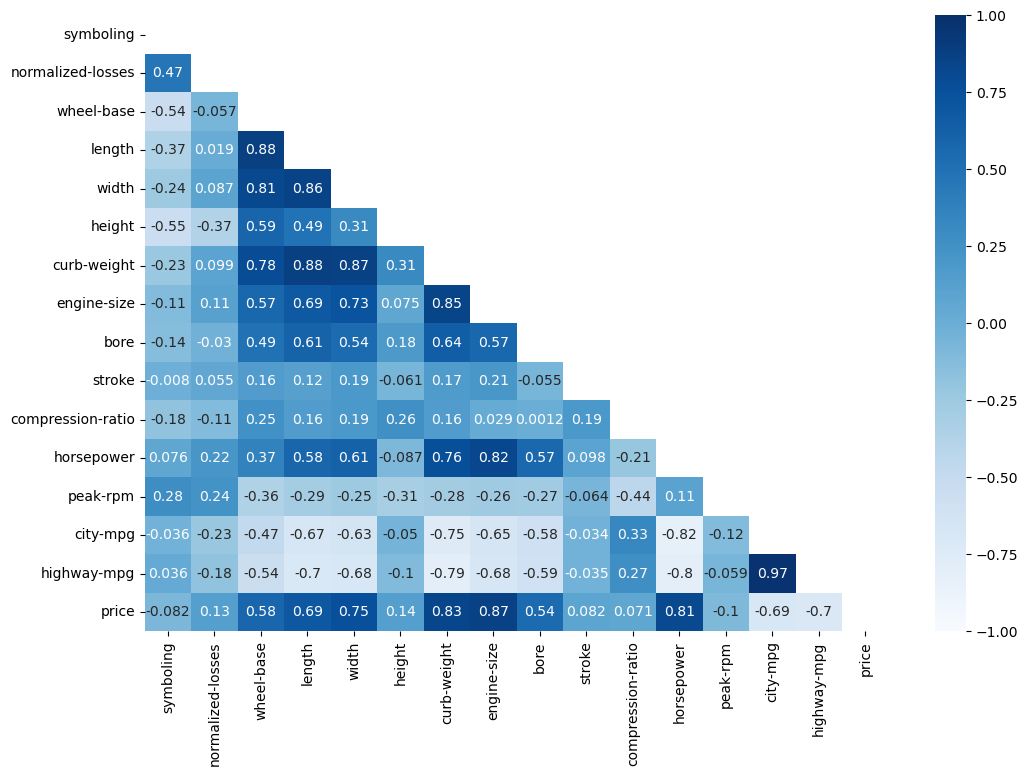

In [18]:
#Visualizing correlations using a heatmap 
plt.figure(figsize=(12,8))     
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Blues', vmin=-1, vmax=1)
plt.show()

From the table and heatmap we can conclude that 9 out of 16 numerical features exhibit moderate to strong correlations with the target variable, car price. Features with correlation coefficients above 0.5 or below -0.5 will be selected for developing the model. These are engine size, curb weight, horsepower, car width and length, highway miles/gallon, city miles/gallon, wheel base, and bore. Now analyzing the relationship between the remaining categorical variables and price.


**1.2 One Way ANOVA for categorical variables**


In [19]:
#Performing One Way ANOVA on the categorical variables 
sig_ByVariable = {}
for col in df.columns:
    if df[col].dtype == 'object':
        if "-" in str(col):
            col_renamed = '_'.join(col.split('-'))
            df_copy = df.copy()
            df_copy.rename(columns={f'{col}': f'{col_renamed}'}, inplace=True)
            anova_model = ols(f'price ~ C({col_renamed})', data=df_copy).fit()
            anova_table = sm.stats.anova_lm(anova_model, typ=2)
            print(anova_table, '\n')
        else:
            anova_model = ols(f'price ~ C({col})', data=df).fit()
            anova_table = sm.stats.anova_lm(anova_model, typ=2)
            print(anova_table, '\n')

        sig_ByVariable[f'{col}'] = anova_table['PR(>F)'].values[0]



                  sum_sq      df      F  PR(>F)
C(make)  10052718409.355  21.000 33.232   0.000
Residual  2578454279.282 179.000    NaN     NaN 

                      sum_sq      df     F  PR(>F)
C(fuel_type)   153743226.341   1.000 2.452   0.119
Residual     12477429462.296 199.000   NaN     NaN 

                       sum_sq      df     F  PR(>F)
C(aspiration)   407335500.452   1.000 6.631   0.011
Residual      12223837188.184 199.000   NaN     NaN 

                         sum_sq      df     F  PR(>F)
C(num_of_doors)    22745689.183   1.000 0.359   0.550
Residual        12608426999.454 199.000   NaN     NaN 

                       sum_sq      df     F  PR(>F)
C(body_style)  1983645570.040   4.000 9.129   0.000
Residual      10647527118.597 196.000   NaN     NaN 

                        sum_sq      df      F  PR(>F)
C(drive_wheels) 5141171794.579   2.000 67.954   0.000
Residual        7490000894.058 198.000    NaN     NaN 

                            sum_sq      df      F  PR(>

Based on the resulting tables, features with a p-value (PR(>F)) below 0.05 can be said to have a significant relationship with car price. I will now sort the categorical variables by the resulting p-value to determine which variables are most strongly associated with car price in an descending order. 


In [20]:
#Now, sorting the ANOVA results by most significant to least significant 
sig_ByVariable_sorted = sorted([(val, key) for (key, val) in sig_ByVariable.items()])    
for val, key in sig_ByVariable_sorted:
    print('{}: {:,.3f}'.format(key, val))


make: 0.000
num-of-cylinders: 0.000
drive-wheels: 0.000
fuel-system: 0.000
engine-type: 0.000
body-style: 0.000
engine-location: 0.000
aspiration: 0.011
fuel-type: 0.119
num-of-doors: 0.550


As demonstrated, all the tested categoircal variables, with exception of fuel type and number of doors, show a significant relationship with price; that is, they likely affect the final car pricing. The ANOVA test doesn't tell us exactly which group within a given categorical variable affects price the most, but it should be enough for telling us which variables can be used to build the model as they're likely to be good predictors.

**Updating the dataframe** <br>

Before identifying the selecting the variables that will be used to train the model, first we need to get a clean dataframe with only the relevant data. As such, I will remove all the variables or coloumns that proved unnecessary or won't be needed during analysis and model training to get a clean dataframe with only the relevant data.


In [21]:
#Identifying and removing the unnecessary coloumns 
unnecessary_cols = (categorical_cols + [col for col in df_new.columns if re.findall('fuel-type|num-of-doors', col)]
                    + [col for col in correlations_ByPrice.index if abs(correlations_ByPrice.loc[col]) < 0.5])


#removing unnecessary coloumns and obtaining a new, updated dataframe 
df_updated = df_new.drop(unnecessary_cols, axis=1)

#Previewing the final dataframe 
df_updated.head()
      

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.600,168.800,64.100,2548,130,3.470,111,21,27,13495,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,88.600,168.800,64.100,2548,130,3.470,111,21,27,16500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,94.500,171.200,65.500,2823,152,2.680,154,19,26,16500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,99.800,176.600,66.200,2337,109,3.190,102,24,30,13950,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,99.400,176.600,66.400,2824,136,3.190,115,18,22,17450,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


**Selecting the predictor and target variables** <br>
Now selecting the variables for training the model. We will have a total of 17 predictors or independent variables, the car attributes proved to be most relevant, and 1 targer or dependent variable, price.


In [22]:
#specifying the predictor variables and assigning them to 'x_data'
x_data = df_updated.drop('price', axis=1)

#specifying the target variable, price, and assigning it to 'y_data'
y_data = df_updated['price']


**2. Data Splitting** <br> 

Now that the data is ready, the next step is to split it into a training set and a testing set. The training set will be used to develop and fit the model as well as for performing in-sample evaluations, meanwhile the testing set will be used for testing the model and estimating the model's generalization error. Accordingly, I will perform a standard 80/20 split such that 80% of the data will be used for training and the remaining 20% for testing. The goal of data splitting is to get an appropriate estimate of how the model is likely to perform in the real world with novel data, which the preserved testing sample is aimed to emulate.


In [23]:
#Performing data splitting to obtain a training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.80, random_state=0)

#Check the size of both sets 
print('Number of training samples:', x_train.shape[0])    
print('Number of testing samples:', x_test.shape[0])


Number of training samples: 160
Number of testing samples: 41


**3. Feature Scaling: Normalizing the scales** <br>

As a last step in data preprocessing, it is best practice to perform feature scaling on the numerical variables to normalize their scales. This is to ensure that the varying scales of the different variables, and their likely varying distributions, doesn't affect the analysis and/or the model's validity. Feature normalization controls for the diversity of scales and score distributions by rescaling all the variables such that their values all fall within the same score range of 0 to 1. Note however, feature scaling will be performed only on the original, non-encoded numerical variables, given that the categorical variables were already transformed during one hot encoding to also fall in the range of 0 to 1. And thus, first, I will isolate them from the training and testing sets before scaling and then merging them back with the rest of the data. 


In [24]:
#First, identify the numerical variables and assign them to 'num_vars' 
num_vars = [col for col in correlations_ByPrice.index if 1 > abs(correlations_ByPrice.loc[col]) > 0.5]

#Now normalizing only those variables 
#get a scaler object 
Scaler = MinMaxScaler()

#fitting and scaling the training set 
num_train_scaled = Scaler.fit_transform(x_train[num_vars]) 

#scaling the testing set 
num_test_scaled = Scaler.transform(x_test[num_vars])


#replacing unscaled coloumns with their scaled counterparts 
x_train.drop(num_vars, axis=1, inplace=True)
x_test.drop(num_vars, axis=1, inplace=True)
x_train, x_test = np.concatenate([num_train_scaled, x_train], axis=1), np.concatenate([num_test_scaled, x_test], axis=1)


*Now the data is ready for analysis and model development...*

### Part Four: Model Development and Evaluation
<br>

**In this section I will develop and evaluate multiple models in order to find the best one for the current data, i.e., the model with the best predictive power. First, I will develop two models, the first a multiple regression model that assumes a linear relationship between predictor variables selected above and the target variable, car price, and the second a multivariate polynomial model which assumes a non-linear or 'curvilinear' relationship between the predictors and target. Both models will be evaluated and the one that proves to be the best fit for the data will be selected for further adjustments and fine-tuning before developing the final model.** <br>
**As such, each model will be trained and evaluated using the training set obtained earlier and then evaluated one last time using the testing set in order to get an approximate estimate of how the model is likely to perform in the real world, that is, get an estimate of its generalization error. For evaluating the models, each model will be evaluated using the R-squared metric which tells us how much variance in price is accounted for by the model (i.e. predictors), and the root mean squared error, which would tell us how much on average the predicted prices generated by the model deviate from the actual prices.**
<br><br>


#### MODEL ONE: Multiple Linear Regression Model
<br>
A multiple regression model is a type of regression model that depicts a linear relationship between multiple predictors and the target. In this case the model will capture the relationship between the relevant car attribute selected earlier and price. 
<br>


In [25]:
#Create a regression object 
multireg_model = LinearRegression()

#Fitting the model using the training data 
multireg_model.fit(x_train, y_train)

#Evaluating the model with the testing set using the R-Squared metric
R2_test = multireg_model.score(x_test, y_test)
print(f'The R-squared score for the multiple regression model is: r2={round(R2_test,3)}')


The R-squared score for the multiple regression model is: r2=0.921


As demonstrated in the output, we can interpret the resulting R-squared score as indicating that up to 92% of the variance in car prices is in fact accounted for and explained by the model! This is a great result for a first test run.


Now we can use the first model to generate price predictions and compare them to the actual prices


In [26]:
#Generating predictions using the testing set
Y_pred = multireg_model.predict(x_test) 

#We can compare the actual prices vs. predicted prices 
Actual_vs_Predicted = pd.concat([pd.Series(y_test.values), pd.Series(Y_pred)], axis=1, ignore_index=True).rename(columns={0:'Actual Prices', 1:'Predicted Prices'})
Actual_vs_Predicted['Actual Prices'] = Actual_vs_Predicted['Actual Prices'].apply(lambda price: '${:,.2f}'.format(price))
Actual_vs_Predicted['Predicted Prices'] = Actual_vs_Predicted['Predicted Prices'].apply(lambda price: '${:,.2f}'.format(price))

#Previewing the first 10 price comparisons 
Actual_vs_Predicted.head(10)


,Actual Prices,Predicted Prices
0,"$6,295.00","$6,309.81"
1,"$10,698.00","$9,722.09"
2,"$13,860.00","$16,577.85"
3,"$13,499.00","$15,714.88"
4,"$15,750.00","$16,368.64"
5,"$8,495.00","$9,892.58"
6,"$15,250.00","$15,653.94"
7,"$5,348.00","$5,646.74"
8,"$21,105.00","$24,833.45"
9,"$6,938.00","$6,229.93"


We can see from the table that most of the predicted prices match the actual ones quite well. To get the exact price deviation on average, I will employ the root mean squared error metric.

**Model Evaluation: Root Mean Squared Error**

In [27]:
#Calculate the mean squared error (MSE)
MSE = mean_squared_error(y_test, Y_pred)

#Get square root of MSE to obtain root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print(f'The root mean squared error is: RMSE={round(RMSE,3)}')


The root mean squared error is: RMSE=2440.58


The obtained RMSE value indicate that the predicted prices deviate from the actual ones, on average, by approximately $2,440, which indeed proves that the model seems to be a very good fit for the data. I will also use a distribution plot to visualize the discrepancy between the actual and predicted car prices.

**Model Evaluation: Distribution Plot**


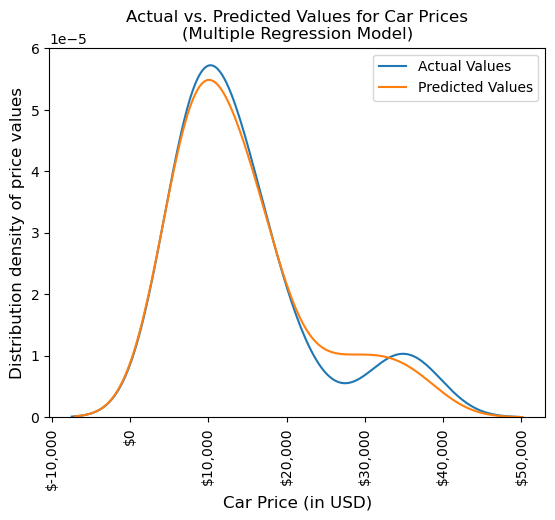

In [28]:
#Visualizing the distribution of actual vs. predicted prices 
#Creating the distribution plot 
ax1 = sns.distplot(y_test, hist=False, label='Actual Values')
sns.distplot(Y_pred, ax=ax1, hist=False, label='Predicted Values')
#Adding a title and labeling the axes
plt.title('Actual vs. Predicted Values for Car Prices\n(Multiple Regression Model)')
plt.xlabel('Car Price (in USD)', fontsize=12)
plt.ylabel('Distribution density of price values', fontsize=12)
plt.legend(loc='best')
#Adjusting the x-axis to display the prices in a reader-friendly format
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=90)

#Displaying the distribution plot
plt.show()


We can see from the distribution plot that the model is able to track the actual prices very well, especially in the lower price range ($0 - $20,000). It seems that the model needs more improvement in the upper price range. Although the model seems a good fit to the data, let's now see how a non-linear regression one would perform; it may or may not improve our price predictions.


#### MODEL TWO: Multivariate Polynomial Regression Model
<br>
A polynomial regression model, unlike a standard, linear one, assumes a non-linear or 'curvilinear' relationship between the predictor variables and the target; in this case, the relevant car attributes selected and price. It tries to account for the variance in the target, price, using a non-linear, or more appropriately, curvilinear function. Note however a polynomial model can have different polynomial 'degrees,' which basically specifies the degree of curvature for the model's regression line, and the degree of curvature in return determines the degree to which the model is able to account for the variance in the data, i.e., target variable. Some data have very high variance and thereby require a higher polynomial degree for the model's regression line to weave through and capture all or most the data points in the target and account for its high variance, others have low variance and require only a small degree for the polynomial function to capture and account for its variance. 
In order to determine which polynomial degree is most appropriate for the model to account for the data, and thereby provide reliable predictions, I will use a k-fold cross validation method and loop over different polynomial degrees to test, compare and contrast these different degrees. I will once again use the training set for training and cross-validation, before assessing the model's performance separately using the testing set. The model with the most optimal polynomial degree, as proven by the r-squared metric, will be selected. 

<br>


In [29]:
#First, specifying the polynomial degrees to test out
poly_orders = [2,3,4]       #up to four polynomials 

#Now looping through the different polynomials and using cross validation determine the most optimal one 
cv_scores = {}
for order in poly_orders: 
    #creating polynomial features object
    poly_features = PolynomialFeatures(degree=order)
    #transforming predictor variables to polynomial features
    x_train_poly = poly_features.fit_transform(x_train)

    #creating a regression object
    polyreg_model = LinearRegression()

    #Now using 5-fold cross validation to obtain the best polynomial degree 
    r2_scores = cross_val_score(polyreg_model, x_train_poly, y_train, cv=5)
    
    #Get mean R-squared for a given polynomial degree 
    cv_scores[order] = np.mean(r2_scores)

#Selecting the best polynomial order 
best_order, best_score = None, None  
for order,score in cv_scores.items():
    if best_score is None or abs(best_score) < abs(score): 
        best_score = score 
        best_order = order 

#Reporting the best model with the most optimal polynomial 
print(f'The best model for the data has a polynomial degree of {best_order}, and R-squared score of: r2={round(best_score,3)}')


The best model for the data has a polynomial degree of 4, and R-squared score of: r2=-1.013502495140319e+22


Based on the cross validation results, the best polynomial degree is 2, however the corresponding r-squared is negative. This is a sign ofoverfitting! This means that the model is able to track the variance in the data so well that it overfits the data. Overfitting is particularly problematic as, while the model may be very good at tracking and generating predictions from the data set fed into it, it will very likely falter when confronting and/or trying to generate predictions from new, previously unseen data. Put differently, overfitting on the training set would prevent learning from transfering well onto new data sets; the model simply becomes too rigid and unflexible enough to accomodate and explain new data, and thus, overfitting often leads to high generalization error. To control for and prevent overfitting we need to perform hyperparameter tuning. As such, I will be performing L1 regularization using Lasso regression. 


### Part Five: Hyperparameter Tuning
<br>

**In this section I will perform hyperparameter tuning to control for the overfitting problem confronted and also check if in doing so the model's predictions can be improved even further. For hyperparameter tuning, as mentioned, I will be using Lasso regression regularization. This technique introduces a new  hyperparameter, 'alpha', to the model's function in order to regularize its coefficients. Particularly, by introducing alpha, lasso regression imposes  penalties on the coefficients to shrink their values. Indeed, alpha can take different values to control the degree of shrinkage: the higher the alpha value, the higher the shrinkage of the coefficients. Further, lasso regression would not only prevent overfitting, but also reduce model complexity and prevent the  potential risk of multicollinearity, a problem that often arises when the predictor variables used to train the model exhibit high dependency among themselves  (see the correlations heatmap above), which too can hinder the model's performance.**
<br><br>

#### Model Development: Polynomial Lasso Regression Model
<br>
As described, lasso regression can regularize coefficients to different degrees using different alpha values. Thus, the task here is to identify the best or most optimal alpha. To do so, I will be employing a cross validation technique known as 'Grid search,' which iterates over different alpha values and identifies the best one. This will help us identify the model with the best fit. I will use this technique also to iterate once again over different polynomial degrees and identify the most optimal one. This time, however, to facilitate processing more, this time I'll employ a pipeline to automate the process. This pipeline would perform a polynomial transform first to convert the model features to polynomial features, and then will fit the data to a lasso regression model. Note, finally, I will be performing the training and cross validation only with the training set and then run a final evaluation on the best obtained model using the testing set in order to get an estimate of how the model will perform with novel, unseen data and thereby estimate its generalization error.
<br>

In [30]:
#Creating a pipeline to automate model development 
#Specifying the pipeline steps 
pipe_steps = [
                ('Polynomial', PolynomialFeatures()),      #performs a polynomial transform
                ('Model', Lasso())        #fits the data to lasso regression model    
                                    ]


#Creating the pipeline 
lasso_model = Pipeline(pipe_steps)


#Grid Search 
#Now performing grid search to obtain the best polynomial order and alpha value
#specifying the hyperparameters to test out (polynomial degrees & alpha values)
parameters = {'Polynomial__degree': [2,3,4],      #specifying the polynomials to test out
              'Model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}     #specifying the alpha values to test out

#Creating a grid object and specifying the cross-validation characteristics
Grid = GridSearchCV(lasso_model, parameters, scoring='r2', cv=5) 

#Fitting the model with the training data for cross validation 
Grid.fit(x_train, y_train)


#Reporting the results of the cross validation (best polynomial order, alpha, and r2 score)
best_order = Grid.best_params_['Polynomial__degree']
best_alpha = Grid.best_params_['Model__alpha']
best_r2 = Grid.best_score_
print(f'The best model has a polynomial degree of {best_order}, alpha value of: alpha={best_alpha}, and r-squared score of r2={round(best_r2,3)}')


The best model has a polynomial degree of 2, alpha value of: alpha=10, and r-squared score of r2=0.881


As demonstrated in the output, the best model has an alpha of 10 and again a polynomial degree of 2. Further, as indicated by the r-squared metric, the model accounts for approximately 88% of the variance in car price. Let's see how it performs when evaluated with the testing data, which should give us the best estimate of its real world performance.


**Model Testing** 
<br>
Now we can test the model one final time using the testing set.


In [31]:
#First, extracting the model with the best hyperparameters 
Lasso_Model = Grid.best_estimator_

#Calculating the R-squared score for the model using the testing set 
R2_test = Lasso_Model.score(x_test, y_test)
print(f'The r-squared score for the testing set is: r2={round(R2_test,3)}')


The r-squared score for the testing set is: r2=0.957


As demonstrated by the resulting r-squared score, the current polynomial model outperformed the earlier, multiple linear regression one on testing, accounting now for approximately 95% of the variance in the target. That is, 95% of the car price variance can be traced back to the car attributes selected for model training! As such, we can conclude that the association between the predictor car attributes and car price is better captured with a non-linear relationship. With some tuning, the polynomial lasso regression model thus seems the best fitted model for the data, and likely the better performing one in the real world with novel data sets. I will now perform further evaluations employing the root mean squared error metric and visualizations to get a better idea of how well the model performed and how it compares to the multiple regression one.


**Model Evaluation: Root Mean Squared Error**

In [32]:
#Generating price predictions using the testing set 
Y_pred_lasso = Lasso_Model.predict(x_test) 
#calculating root mean squared error for the testing set 
MSE = mean_squared_error(y_test, Y_pred_lasso)
RMSE = np.sqrt(MSE)
#Report the resulting RMSE value 
print(f'The root mean squared error is: RMSE={round(RMSE,3)}')


The root mean squared error is: RMSE=1809.617


As shown here as well, the RMSE score improved, indicating that the discrepancy between the actual prices and the prices predicted by the model decreased down to approximately $1,809 on average. This is a fairly good estimate when considering the range of car prices. It indicates that the model can produce fairly reliable predictions not only from the data by which it is trained but also with new, previously unseen data. I will again use a density distribution plot to examine the discrepancy between the predicted and actual prices and get a better insight into the model's current performance. 


**Model Evaluation: Distribution Plot**

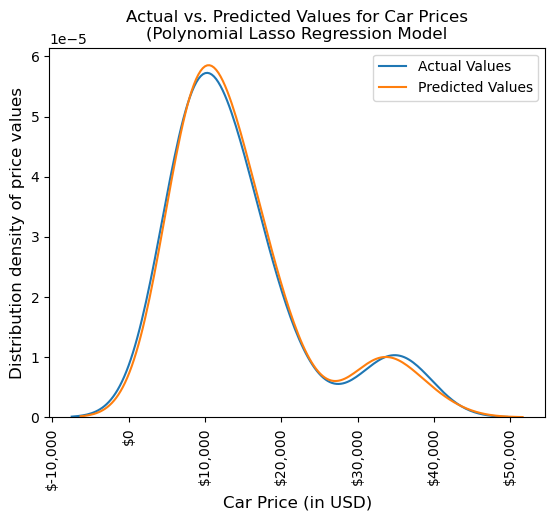

In [33]:
#Setting the characteristics of the plots 
ax1 = sns.distplot(y_test, hist=False, label='Actual Values')
sns.distplot(Y_pred_lasso, ax=ax1, hist=False, label='Predicted Values')
#Adding a title and labeling the axes
plt.title('Actual vs. Predicted Values for Car Prices\n(Polynomial Lasso Regression Model')
plt.xlabel('Car Price (in USD)', fontsize=12)
plt.ylabel('Distribution density of price values', fontsize=12)
plt.legend(loc='best')
#Adjusting the x-axis to display the prices in a reader-friendly format
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=90)

#Displaying the distribution plot
plt.show()


Indeed, as demonstrated in the plot here, the current model is able to generate reliable predictions that almost perfectly match the actual prices. Further, unlike the linear regression model that performed well predicting prices only in the lower price ranges (below $20,000), this model is able to reliably predicted car prices across the board, modeling prices in the lower and higher price ranges as well. We can compare both plots side by side to see how their performances differ more clearly.

**Model Comparison**

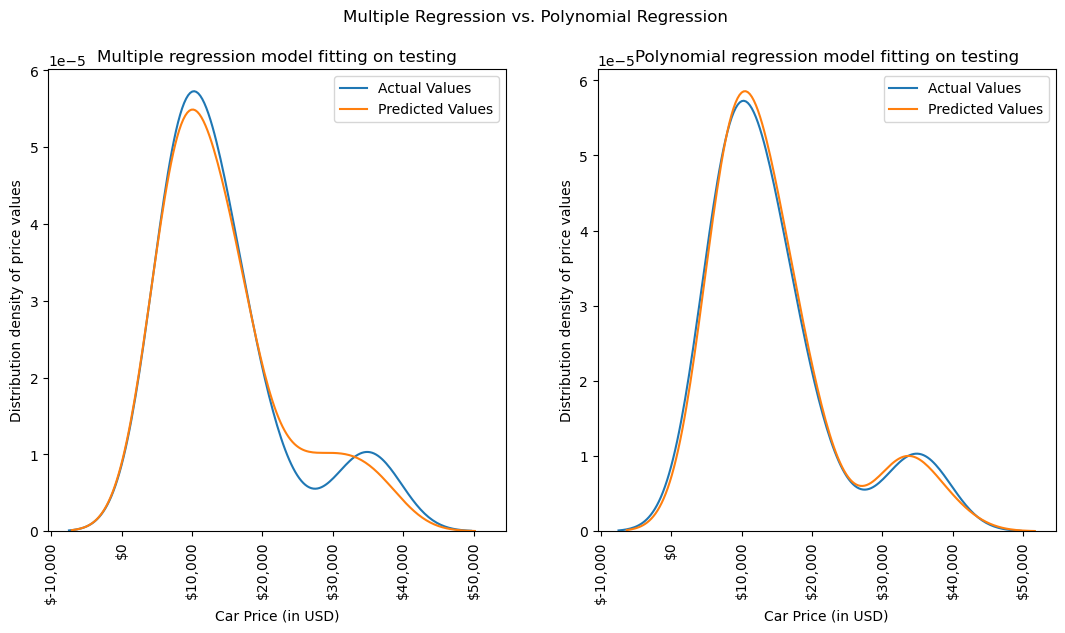

In [34]:
#Setting the characteristics of the plots 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(13,6))
#Visualizing model fitting for the training set 
ax1 = sns.distplot(y_test, hist=False, ax=axes[0], label='Actual Values')
sns.distplot(Y_pred, hist=False, ax=ax1, label='Predicted Values')
#Visualizing model fitting for testing set 
ax2 = sns.distplot(y_test, hist=False, ax=axes[1], label='Actual Values')
sns.distplot(Y_pred_lasso, hist=False, ax=ax2, label='Predicted Values')

#Adding titles and labeling the axes 
fig.suptitle('Multiple Regression vs. Polynomial Regression')
axes[0].set_title('Multiple regression model fitting on testing')
axes[0].set_xlabel('Car Price (in USD)')
axes[0].set_ylabel('Distribution density of price values')
axes[0].legend(loc='best')
axes[1].set_title('Polynomial regression model fitting on testing')
axes[1].set_xlabel('Car Price (in USD)')
axes[1].set_ylabel('Distribution density of price values')
axes[1].legend(loc='best')
#Adjusting the x-axis to display the prices in a reader-friendly format
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.gcf().axes[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#show plot
plt.show()


As shown in the figure, the polynomial model (on the right) outperformed the multiple linear regression one (on the left), both in predicting prices at the peak of the distribution where the most frequent prices occur and also at the upper price range (post-$20,000) where the linear model fell short. Thus, we can conclude that the polynomial model with lasso regularization is the best fitted model for the present dataset.  
Now that the best model is decided on, I will procede to develop the final model with the whole dataset, and applying the best parameters as decided by the earlier evaluations, and finally use the model to generate predictions.


### Part Six: Model Prediction
<br>

**In this section, as mentioned, I will build the final model again with the whole dataset and use it to generate predictions. Further, to automate data processing and model development I will once again use a pipeline, except this time the pipeline will take the raw data and perform the following: (i) One hot encoding for the categorical variables; (ii) feature normalization to rescale the data appropriately; (iii) converting the model features to polynomial features by applying a polynomial transform; and finally, (iv) building a polynomial lasso regression model with the best obtained parameters (polynomial degrees=2, alpha=10). Finally, I will create a custom function that takes a dataset consisting of different car attributes and employs the model to generate price predictions that correspond to these attributes best. I will also define a second function that takes input fom the user regarding all the different car characteristics and return a price prediction that best suits these specified characteristics.**
<br><br>

**Final Model Development**

In [35]:
#First, preparing the data for training the final model 
#specifying predictor variables 
x_data = df[['engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'wheel-base', 'bore', 'city-mpg', 'highway-mpg',
            'make', 'num-of-cylinders', 'drive-wheels', 'fuel-system', 'engine-type', 'body-style', 'engine-location', 'aspiration']] 

#specifying the target variable
y_data = df['price']

#extracting categorical and numerical variables and storing them in separate objects 
# for processing them later separately
numerical_vars = x_data.select_dtypes(exclude='object').columns.tolist()
categorical_vars = x_data.select_dtypes(include='object').columns.tolist()



Now building the pipeline

In [36]:
#Creating the first part of the pipeline for normalizing numerical variables 
pipeline_pt1 = Pipeline([('Scaler', MinMaxScaler())])

#Creating the second part of the pipeline for encoding categorical variables
pipeline_pt2 = Pipeline([('Encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

#Combining both pipelines 
pipeline_pt3 = ColumnTransformer([
                    ('NumScaler', pipeline_pt1, numerical_vars),
                    ('CatEncoder', pipeline_pt2, categorical_vars) 
                                                                   ])

#Adding a polynomial transform function to the pipeline 
pipeline_prep = Pipeline([('ColoumnTransformer', pipeline_pt3), 
                        ('Polynomial', PolynomialFeatures(degree=2))])


In [37]:
#Building the final pipeline for developing the polynomial lasso regression model  
Model = Pipeline([('Preprocessing', pipeline_prep),
                ('Model', Lasso(alpha=10))])

#Training the model with the entire dataset 
Model.fit(x_data, y_data)


Pipeline(steps=[('Preprocessing',
                 Pipeline(steps=[('ColoumnTransformer',
                                  ColumnTransformer(transformers=[('NumScaler',
                                                                   Pipeline(steps=[('Scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['engine-size',
                                                                    'curb-weight',
                                                                    'horsepower',
                                                                    'width',
                                                                    'length',
                                                                    'wheel-base',
                                                                    'bore',
                                                                    'cit

Now the model is ready and can be deployed for predictive pricing...

**Generating price predictions from novel data** <br>

In this part, I will define a custom function, MakePrediction(), which will take novel new data of different car and employs the model to return the most suitable price predictions based on these characteristics.


In [38]:
#Defining the function 
def MakePrediction(model, X_vars): 
    """This function takes two inputs: 'model', which specifies the model to be used to generate the price predictions, 
    and 'X_vars', which specifies the car characteristics for each car to make the price prediction based on. It runs
    the prediction-making process and returns a table with the predicted prices for each house."""
    
    Y_pred = model.predict(X_vars)
    Y_pred_df = pd.Series(Y_pred, name='Predicted Prices').to_frame().apply(lambda series: series.apply(lambda price: '${:,.2f}'.format(price)))
    return Y_pred_df 


For a quick test of the function, I will extract a random sample of 10 data points from the original dataset and pass them to the function, along with the final model developed above. The function should return 10 price predictions as best suited to these 10 data points.


In [39]:
#Extracting a random sample from the dataset and assigning it to 'X_new'
X_new = x_data.sample(10)

#Previewing the sample
X_new


,engine-size,curb-weight,horsepower,width,length,wheel-base,bore,city-mpg,highway-mpg,make,num-of-cylinders,drive-wheels,fuel-system,engine-type,body-style,engine-location,aspiration
19,90,1909,70,63.600,158.800,94.500,3.030,38,43,chevrolet,four,fwd,2bbl,ohc,sedan,front,std
125,194,2800,207,65.000,168.900,89.500,3.740,17,25,porsche,six,rwd,mpfi,ohcf,convertible,rear,std
68,234,3740,155,71.700,202.600,115.600,3.460,16,18,mercedes-benz,eight,rwd,mpfi,ohcv,sedan,front,std
3,109,2337,102,66.200,176.600,99.800,3.190,24,30,audi,four,fwd,mpfi,ohc,sedan,front,std
5,136,2507,110,66.300,177.300,99.800,3.190,19,25,audi,five,fwd,mpfi,ohc,sedan,front,std
51,91,1950,68,64.200,166.800,93.100,3.080,31,38,mazda,four,fwd,2bbl,ohc,sedan,front,std
31,79,1837,60,64.000,150.000,93.700,2.910,38,42,honda,four,fwd,1bbl,ohc,hatchback,front,std
181,109,2212,85,65.500,171.700,97.300,3.190,27,34,volkswagen,four,fwd,mpfi,ohc,sedan,front,std
4,136,2824,115,66.400,176.600,99.400,3.190,18,22,audi,five,4wd,mpfi,ohc,sedan,front,std
146,92,1985,62,63.600,158.700,95.700,3.050,35,39,toyota,four,fwd,2bbl,ohc,hatchback,front,std


In [40]:
#Now passing the data to the MakePrediction() function to get price predictions
MakePrediction(Model, X_new)


,Predicted Prices
0,"$6,469.27"
1,"$35,824.33"
2,"$34,631.89"
3,"$12,219.99"
4,"$14,449.95"
5,"$6,937.93"
6,"$6,354.12"
7,"$9,012.38"
8,"$16,749.58"
9,"$6,437.99"


Showing the car characteristics and the corresponding predicted prices together

In [41]:
#Reindex and add predicted prices to dataframe 
sample_and_prediction, sample_and_prediction['Predicted Prices'] = X_new.reset_index(drop=True), MakePrediction(Model, X_new)
sample_and_prediction


,engine-size,curb-weight,horsepower,width,length,wheel-base,bore,city-mpg,highway-mpg,make,num-of-cylinders,drive-wheels,fuel-system,engine-type,body-style,engine-location,aspiration,Predicted Prices
0,90,1909,70,63.600,158.800,94.500,3.030,38,43,chevrolet,four,fwd,2bbl,ohc,sedan,front,std,"$6,469.27"
1,194,2800,207,65.000,168.900,89.500,3.740,17,25,porsche,six,rwd,mpfi,ohcf,convertible,rear,std,"$35,824.33"
2,234,3740,155,71.700,202.600,115.600,3.460,16,18,mercedes-benz,eight,rwd,mpfi,ohcv,sedan,front,std,"$34,631.89"
3,109,2337,102,66.200,176.600,99.800,3.190,24,30,audi,four,fwd,mpfi,ohc,sedan,front,std,"$12,219.99"
4,136,2507,110,66.300,177.300,99.800,3.190,19,25,audi,five,fwd,mpfi,ohc,sedan,front,std,"$14,449.95"
5,91,1950,68,64.200,166.800,93.100,3.080,31,38,mazda,four,fwd,2bbl,ohc,sedan,front,std,"$6,937.93"
6,79,1837,60,64.000,150.000,93.700,2.910,38,42,honda,four,fwd,1bbl,ohc,hatchback,front,std,"$6,354.12"
7,109,2212,85,65.500,171.700,97.300,3.190,27,34,volkswagen,four,fwd,mpfi,ohc,sedan,front,std,"$9,012.38"
8,136,2824,115,66.400,176.600,99.400,3.190,18,22,audi,five,4wd,mpfi,ohc,sedan,front,std,"$16,749.58"
9,92,1985,62,63.600,158.700,95.700,3.050,35,39,toyota,four,fwd,2bbl,ohc,hatchback,front,std,"$6,437.99"


**Generating price predictions from user input** <br> 

Finally, for this last part I will define another custom function, MakePrediction_forUser(), which takes user input with the all characteristics of the car they wish to predict the price of and returns a price prediction that best suits these given characteristics.


In [42]:
#Defining the function 
def MakePrediction_forUser(model, x_data):
    """This function asks the user for 17 inputs for 17 different car attributes: 
        Car brand - engine size - horsepower - fuel system - city MPG - highway MP -, engine type - engine location - 
        number of cylinders - curb weight - length - width - body style - drive wheels type - wheelbase - bore size - 
        aspiration engine type.
        
        After taking user input, the function returns a price prediction as best suited for these characteristics."""

    #create empty dictionary for input values 
    X_vars = dict()

    #Take user input for car characteristics 
    while True:
        make = input('Enter car brand: ')
        if make not in x_data['make'].unique().tolist(): 
            print('''Invalid car brand. This function only supports the list below:
                    [alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz,
                     mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,
                     volswagen, volvo].
                Please make sure to select a car brand featured on this list.\n''')
            continue 
        break 
    while True:
        try:
            engine_size = float(input('Enter engine size: '))
            break 
        except:
            print('Invalid input. Engine size must be a numerical value. Try again...\n')
            continue 
    while True:
        try:
            horsepower = float(input('Enter horsepower: '))
            break 
        except:
            print('Invalid input. Horsepower must be a numerical value. Try again...\n')
            continue 
    while True:
        fuel_system = input('Enter type of fuel system: ')
        if fuel_system not in x_data['fuel-system'].unique().tolist():
            print('''Invalid fuel system. This function only supports the list below:
                    [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdim spfi].
                Please make sure to select a fuel system featured on this list.\n''')
            continue 
        break 
    while True: 
        try:            
            city_mpg = float(input('Enter city mpg: '))
            break
        except:
            print('Invalid input. City mpg must be a numerical value. Try again...\n')
            continue
    while True:
        try:
            highway_mpg = float(input('Enter highway mpg: '))
            break
        except:
            print('Invalid input. Highway mpg must be a numerical value. Try again...')
            continue
    while True: 
        engine_type = input('Enter engine type: ')
        if engine_type not in x_data['engine-type'].unique().tolist():
            print('''Invalid engine type. This function only supports the list below:
                    [l, dohc, ohc, ohcf, ohcv, rotor].
                Please make sure to select an engine type featured on this list.\n''')
            continue 
        break 
    while True:
        engine_location = input('Enter engine location: ')
        if engine_location not in x_data['engine-location'].unique().tolist():
            print("Invalid engine location. Engine location must be either 'front' or 'rear'. Please try again...\n")
            continue 
        break 
    while True: 
        num_of_cylinders = input('Enter number of cylinders (as written number): ')
        if num_of_cylinders not in x_data['num-of-cylinders'].unique().tolist():
            print('''Invalid number of cylinders. This function only supports the values below:
                    [two, three, four, five, six, eight, twelve].
                Please make sure to select a number featured on this list.\n''')
            continue 
        break 
    while True: 
        try:
            curb_weight = float(input('Enter car curb weight: '))
            break
        except:
            print('Invalid input. Curb weight must be a numerical value. Try again...\n')
            continue
    while True:
        try:
            length = float(input('Enter car length: '))
            break
        except:
            print('Invalid input. Car length must be a numerical value. Try again...\n')
            continue
    while True:
        try:
            width = float(input('Enter car width: '))
            break
        except:
            print('Invalid input. Car width must be a numerical value. Try again...\n')
            continue
    while True: 
        body_style = input('Enter body style: ')
        if body_style not in x_data['body-style'].unique().tolist():
            print('''Invalid car body style. This function only supports the values below:
                    [convertible, hardtop, hatchback, sedan, wagon].
                Please make sure to select a body style featured on this list.\n''')
            continue 
        break 
    while True:
        drive_wheels = input('Enter type of drive wheels: ')
        if drive_wheels not in x_data['drive-wheels'].unique().tolist():
            print('''Invalid drive wheels type. This function only supports the values below:
                    [4wd, fwd, rwd].
                Please make sure to select a drive wheel type featured on this list.\n''')
            continue 
        break 
    while True:
        try:
            wheel_base = float(input('Enter wheel base distance: '))
            break
        except:
            print('Invalid input. Wheel base distance must be a numerical value. Try again...\n')
            continue
    while True: 
        try:
            bore = float(input('Enter bore size: '))
            break 
        except:
            print('Invalid input. Bore size must be a numerical value. Try again...\n')
    while True:
        aspiration = input('Enter aspiration engine type: ')    
        if aspiration not in x_data['aspiration'].unique().tolist():
            print("Invalid aspiration engine type. This function only supports 'std' and 'turbo'. Please try again...\n")
            continue 
        break 
        
    print('\n\n')

    #Adding values to dictionary
    X_vars['engine-size'], X_vars['horsepower'], X_vars['city-mpg'],  X_vars['highway-mpg']  = [engine_size], [horsepower], [city_mpg], [highway_mpg] 
    X_vars['length'], X_vars['width'], X_vars['curb-weight'], X_vars['wheel-base'], X_vars['bore'] = [length], [width], [curb_weight], [wheel_base], [bore]
    X_vars['make'], X_vars['fuel-system'], X_vars['engine-type'], X_vars['engine-location'] = [make], [fuel_system], [engine_type], [engine_location]
    X_vars['num-of-cylinders'], X_vars['body-style'], X_vars['drive-wheels'], X_vars['aspiration'] = [num_of_cylinders], [body_style], [drive_wheels], [aspiration]
    
    #convert dictionary to dataframe 
    df_X_vars = pd.DataFrame(X_vars)

    #Generate and return price prediction
    Y_pred =  model.predict(df_X_vars)
    return 'For a car with the given characteristics, the predicted price is: ${:,.2f}.'.format(Y_pred[0])


In [43]:
#Now we can use the function to produce a prediction from user input 
MakePrediction_forUser(Model, x_data)


Enter car brand: honda
Enter engine size: 92
Enter horsepower: 76
Enter type of fuel system: 1bbl
Enter city mpg: 31
Enter highway mpg: 38
Enter engine type: ohc
Enter engine location: front
Enter number of cylinders (as written number): four
Enter car curb weight: 1819
Enter car length: 144.6
Enter car width: 63.9
Enter body style: hatchback
Enter type of drive wheels: fwd
Enter wheel base distance: 86.6
Enter bore size: 2.91
Enter aspiration engine type: std





'For a car with the given characteristics, the predicted price is: $6,312.93.'

In [44]:
#END